# Sprint 4

## Pt.1

#### Third Normal Form:

2. **It has no transitive dependencies**:
    - This means that no non-key attribute should depend on another non-key attribute. In other words, for any functional dependency \( A -> B \) (where \( A \) and \( B \) are sets of attributes), one of the following must be true:
        - \( A \) is a superkey, or
        - \( B \) is a prime attribute (an attribute that is part of a candidate key).


##### Main Tables Review

**Session Table**
- **Primary Key:** `SessionID`
- **3NF Status:** Already in 3NF (no non-key attributes).

**Portfolio Table**
- **Primary Key:** `PortfolioID`
- **Non-key Attributes:** `TotalAmt`, `Risk`
- **3NF Status:** Each non-key attribute depends only on the primary key. No transitive dependencies.

**Allocation Table**
- **Primary Key:** `AllocID`
- **Non-key Attributes:** `Ticker`, `Amount`
- **3NF Status:** Each non-key attribute depends only on the primary key. No transitive dependencies.

**Stocks Table**
- **Primary Key:** `StockID`
- **Non-key Attributes:** `Ticker`, `Sector`, `Price`, `SD`, `ERet`
- **3NF Status:** Each non-key attribute depends only on the primary key. No transitive dependencies.

**History Table**
- **Primary Key:** `HistoryID`
- **Non-key Attributes:** `Ticker`, `Date`, `Price`
- **3NF Status:** Each non-key attribute depends only on the primary key. No transitive dependencies.

#### Relationship Tables Review

**PortfolioHasStock Table**
- **Composite Primary Key:** `PortfolioID`, `StockID`
- **3NF Status:** No non-key attributes. Composite key uniquely identifies each row.

**AllocationHasStock Table**
- **Composite Primary Key:** `AllocID`, `StockID`
- **3NF Status:** No non-key attributes. Composite key uniquely identifies each row.

**StockHasHistory Table**
- **Composite Primary Key:** `StockID`, `HistoryID`
- **3NF Status:** No non-key attributes. Composite key uniquely identifies each row.

**SessionHasPortfolio Table**
- **Composite Primary Key:** `SessionID`, `PortfolioID`
- **3NF Status:** No non-key attributes. Composite key uniquely identifies each row.

**PortfolioHasAllocation Table**
- **Composite Primary Key:** `PortfolioID`, `AllocID`
- **3NF Status:** No non-key attributes. Composite key uniquely identifies each row.

#### Conclusion
The given schema appears to already be in 3NF. Each table's non-key attributes are dependent on the whole primary key, and there are no transitive dependencies.


##### Fourth Normal Form

2. **It has no non-trivial multi-valued dependencies**:
    - A multi-valued dependency \( A ->> B \) exists if for each value of \( A \), there is a set of values for \( B \) that are independent of other attributes.
    - A multi-valued dependency \( A ->> B \) is non-trivial if \( B \) is not a subset of \( A \) and \( A \cup B \) is not the whole set of attributes of the relation.
    - For any non-trivial multi-valued dependency \( A ->> B \), \( A \) must be a superkey.


#### Applying 4NF Decomposition Verification to the Schema

1. **Check for 4NF Violations**:
   - Reviewed each table and their dependencies.
   - No non-trivial multi-valued dependencies (MVDs) found where the left-hand side is not a superkey.

2. **Return Relation R**:
   - Since no 4NF violations were found in step 1, we conclude that the original schema \( R \) is in 4th Normal Form (4NF).

#### Conclusion

Based on the analysis and application of the 4NF decomposition algorithm, the schema does not have any violations of 4NF. Therefore, the original schema is confirmed to be in Fourth Normal Form (4NF) already. There is no need for further decomposition or normalization adjustments based on 4NF principles.


### Check Constraints and Triggers

#### Usage
- Check Constraints: Used to enforce domain integrity by specifying conditions that must be true for data to be inserted or updated in a table.
- Triggers: Used to automatically perform actions (such as updating other tables or enforcing business rules) in response to data modification events (like INSERT, UPDATE, DELETE).

#### Check Constraints Examples

#### Ensuring Non-Negative Amount in Allocation Table

```sql
ALTER TABLE Allocation
MODIFY COLUMN Amount FLOAT NOT NULL CHECK (Amount >= 0);
```
- Purpose: Ensures that the Amount column in the Allocation table cannot be negative.

#### Price Check in Stocks Table

```sql
ALTER TABLE Stocks
ADD CHECK (Price >= 0);
```
- Purpose: Ensures that the Price of a stock in the Stocks table is always non-negative.

#### Trigger Examples

#### Update Stock Price History

```sql
CREATE TRIGGER update_history
AFTER UPDATE ON Stocks
FOR EACH ROW
BEGIN
    INSERT INTO History (Ticker, Date, Price)
    VALUES (OLD.Ticker, CURDATE(), NEW.Price);
END;
```
- Purpose: Automatically updates the History table with the new price of a stock whenever its Price is updated in the Stocks table.

#### Track Portfolio Changes

```sql
CREATE TRIGGER track_portfolio_changes
AFTER INSERT ON PortfolioHasStock
FOR EACH ROW
BEGIN
    INSERT INTO PortfolioHasAllocation (PortfolioID, AllocID)
    VALUES (NEW.PortfolioID, (SELECT AllocID FROM Allocation WHERE Ticker = (SELECT Ticker FROM Stocks WHERE StockID = NEW.StockID)));
END;
```
- Purpose: Automatically tracks changes in the PortfolioHasStock relationship by updating the PortfolioHasAllocation table based on the stocks added to a portfolio.


### NULL Values

#### Boolean Operations with NULL Values
- Logical Operations: Demonstrate how NULL values influence AND, OR, NOT, and XOR operations in SQL queries using truth tables.

#### Joins and Outer Joins
- Inner Joins: Analyze SQL queries that use inner joins to retrieve data from tables containing NULL values.

- Left Outer Joins: Explore scenarios where left outer joins are used to include all records from one table (LEFT) and matching records from a second table (RIGHT) with potential NULL values.

#### Constraints and NULL Handling
- Check Constraints: Apply check constraints to restrict the insertion of NULL values into specific columns.

#### Error Handling and Data Integrity
- Data Integrity Constraints: Investigate scenarios where data integrity constraints (e.g., foreign keys) enforce relationships between tables, considering the presence of NULL values.

#### Example Scenarios

- Inserting New Portfolio with Optional Risk
- When inserting a new portfolio into Portfolio, if the Risk field is not known initially, it could be inserted as NULL.
```sql
INSERT INTO Portfolio (PortfolioID, TotalAmt, Risk)
VALUES (1, 10000.0, NULL);
```

- Assigning Stocks to Portfolios
- If a portfolio does not currently hold any stocks, its entry in PortfolioHasStock might initially contain NULL values for StockID.
```sql
INSERT INTO PortfolioHasStock (PortfolioID, StockID)
VALUES (1, NULL);
```

- Querying with Outer Joins
- To find portfolios and their associated stocks, including those without any assigned stocks, an outer join can be used to include NULL StockID.
```sql
SELECT P.PortfolioID, S.StockID
FROM Portfolio P
LEFT JOIN PortfolioHasStock PS ON P.PortfolioID = PS.PortfolioID
LEFT JOIN Stocks S ON PS.StockID = S.StockID;

```

#### Conclusion
Understanding NULL values is crucial for database management, as they provide a mechanism to represent missing or undefined data. Mastering their behavior in SQL queries and their implications on data integrity ensures efficient and accurate database operations.

### Testing SQL

Designing an input domain model involves identifying various input scenarios and conditions that need to be tested to ensure comprehensive coverage of the schema. Here’s how you can approach designing an input domain model for the schema provided:

#### Input Domain Model Example

Session Table:

- Insert valid session IDs.
- Verify constraints for primary keys.

Portfolio Table:

- Test various amounts (TotalAmt) and risk levels (Risk).
- Verify constraints for primary keys and null values.
    
Allocation Table:

- Test different ticker symbols (Ticker) and amounts (Amount).
- Check constraints for primary keys and null values.

Stocks Table:

- Insert stocks with various attributes (Ticker, Sector, Price, SD, ERet).
- Verify constraints for primary keys and null values.

History Table:

- Test historical data entries with valid dates (Date) and prices (Price).
- Verify constraints for primary keys and null values.

Relationship Tables (PortfolioHasStock, AllocationHasStock, etc.):

- Test scenarios involving relationships between tables (e.g., linking portfolios with stocks, allocations with stocks).
- Verify constraints for foreign keys and null values.

#### Conclusion
Designing an input domain model helps in identifying suitable unit tests by systematically covering various scenarios and conditions within the database schema. This approach ensures comprehensive test coverage, including boundary conditions, error handling, and integration scenarios, thus validating the robustness and correctness of the database schema and its operations.

### Simplifying Queries

#### Original Complex SQL Code

```sql
SELECT * FROM (
    SELECT *
    FROM Stocks
    WHERE Sector = 'Technology'
)
WHERE Price > 100;
```

#### Relational Algebra 

1. Subquery

$$
\begin{aligned}
\sigma_{\text{Sector} = \text{'Technology'}} (\text{Stocks})
\end{aligned}
$$

2. Outer query 

$$
\begin{aligned}
\sigma_{\text{Price} > 100}( \sigma_{\text{Sector} = \text{'Technology'}} (\text{Stocks}))
\end{aligned}
$$

#### Simplified Code

```sql
SELECT *
FROM Stocks
WHERE Sector = 'Technology' AND Price > 100;

```

#### Relational Algebra

$$
\begin{aligned}
\sigma_{\text{Sector} = \text{'Technology'} \land \text{Price} > 100} (\text{Stocks})
\end{aligned}
$$

#### Explanation

1. Original Complex SQL Code
    - The subquery filters the Stocks relation to only those tuples where the Sector is 'Technology'.
    - The outer query applies an additional selection on the result of the subquery to filter those tuples where the Price is greater than 100
2. Simplified SQL Code
    - The simplified query directly applies both conditions in a single selection operation, represented as 


#### Original Complex Code

```sql
SELECT * FROM
(    
    SELECT * FROM Stocks
    WHERE Sector = 'Technology'
)
NATURAL JOIN
(   
    SELECT * FROM Stocks
    WHERE Price > 100
);

```

$$
\begin{aligned}
\sigma_{\text{Sector} = \text{'Technology'}} (\text{Stocks}) \bowtie \sigma_{\text{Price} > 100} (\text{Stocks}) \\
\end{aligned}
$$


#### Simplified Code 

```sql
SELECT *
FROM Stocks
WHERE Sector = 'Technology'
  AND Price > 100;

```

$$
\begin{aligned}
\sigma_{\text{Sector} = \text{'Technology'} \land \text{Price} > 100} (\text{Stocks})
\end{aligned}
$$


#### Explanation

- The original query selects from Stocks where Sector is 'Technology' in one subquery and where Price is greater than 100 in another.
- The simplified query combines these conditions in a single SELECT statement with AND conditions.

## Pt.2

### Summary: Last sprint's goals

-  (Analytics, L4) Optimize SQL queries to map onto more efficient physical operators
-  (Modelling, L3) Apply advanced ERD constructs/normalization methods 
-  (Engineering, L2) Ensure DB can be used in concurrent, multi-user environment

Also: Views, as recommended by TA

### Resulting changes to [`portef`](https://github.com/CSC370-Project/portef)

Note: All changes documented in portefV1-5 in [main project repo](https://github.com/CSC370-Project/Risk-Assessment-in-SQL-Python) or in [gh commits](https://github.com/CSC370-Project/portef/commits/main)

#### 1. **Logic changes**

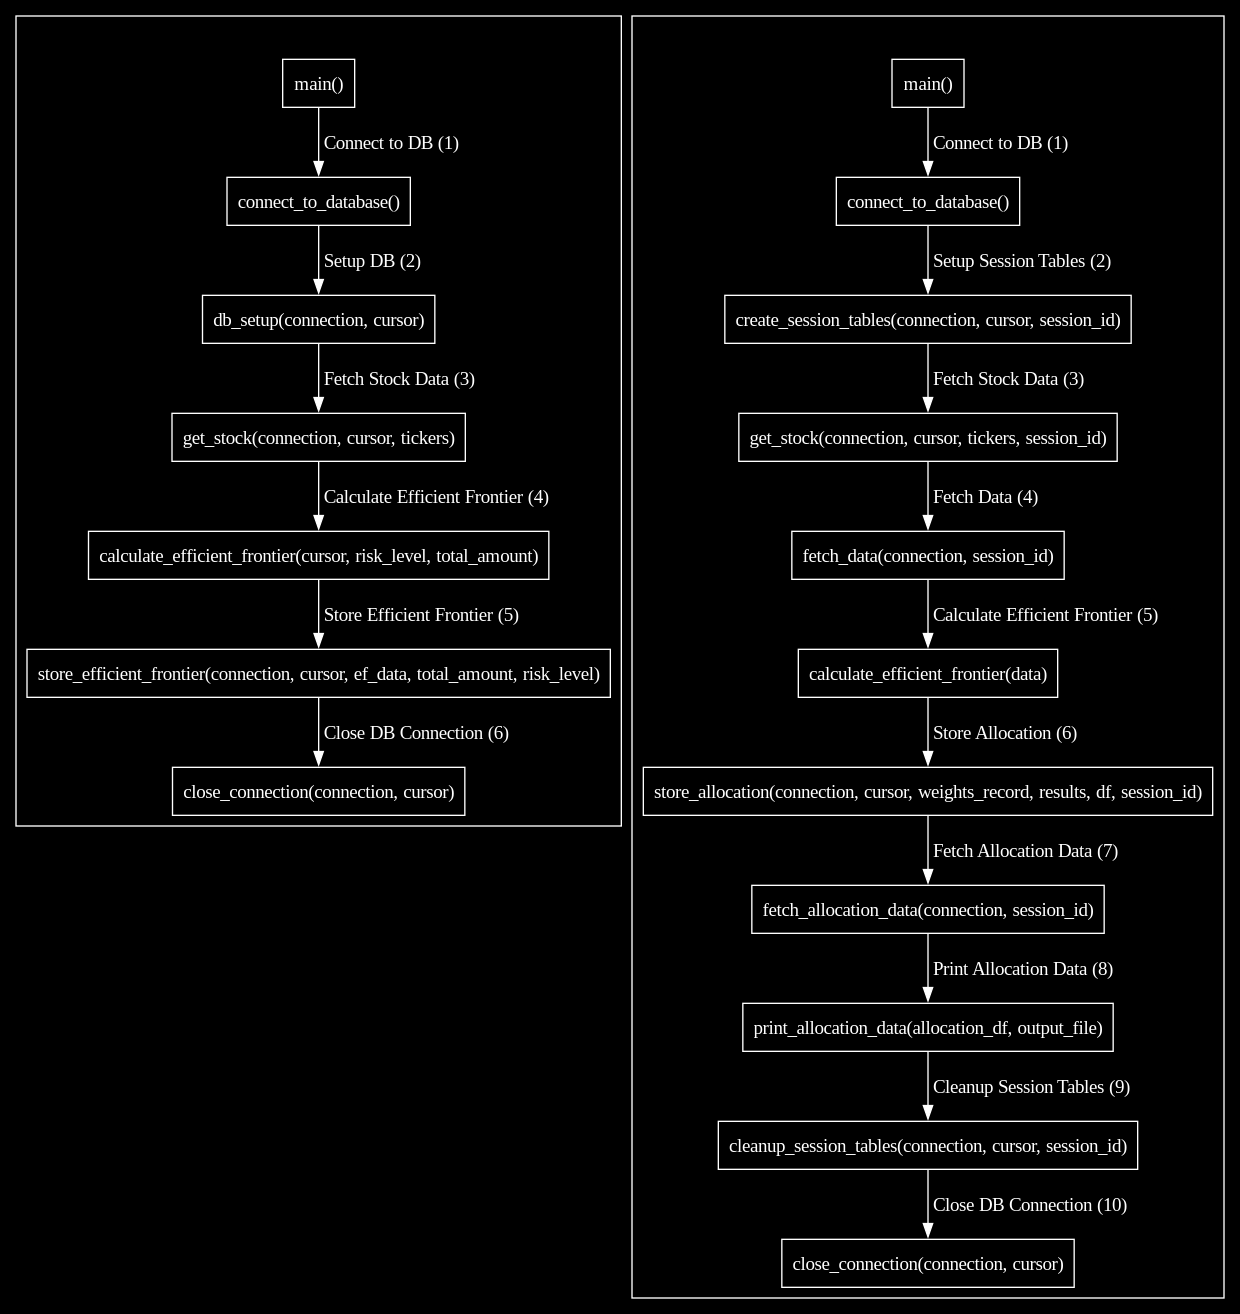

In [9]:
from graphviz import Digraph
from IPython.display import display, Image

# Create a new directed graph for the combined output
dot = Digraph(comment='Program Logic Comparison')

# Set graph attributes for black background and white text/lines
dot.attr(bgcolor='black')
dot.attr('node', style='filled', fillcolor='black', fontcolor='white', color='white', shape='box')
dot.attr('edge', color='white', fontcolor='white')

# Define subgraph for Sprint 3
with dot.subgraph(name='cluster_sprint3') as sprint3:
    sprint3.attr(label='Sprint 3', color='white')
    sprint3.node('A', 'main()')
    sprint3.node('B', 'connect_to_database()')
    sprint3.node('C', 'db_setup(connection, cursor)')
    sprint3.node('D', 'get_stock(connection, cursor, tickers)')
    sprint3.node('E', 'calculate_efficient_frontier(cursor, risk_level, total_amount)')
    sprint3.node('F', 'store_efficient_frontier(connection, cursor, ef_data, total_amount, risk_level)')
    sprint3.node('G', 'close_connection(connection, cursor)')
    sprint3.edge('A', 'B', ' Connect to DB (1)')
    sprint3.edge('B', 'C', ' Setup DB (2)')
    sprint3.edge('C', 'D', ' Fetch Stock Data (3)')
    sprint3.edge('D', 'E', ' Calculate Efficient Frontier (4)')
    sprint3.edge('E', 'F', ' Store Efficient Frontier (5)')
    sprint3.edge('F', 'G', ' Close DB Connection (6)')

# Define subgraph for Sprint 4
with dot.subgraph(name='cluster_sprint4') as sprint4:
    sprint4.attr(label='Sprint 4', color='white')
    sprint4.node('Aa', 'main()')
    sprint4.node('Bb', 'connect_to_database()')
    sprint4.node('Cc', 'create_session_tables(connection, cursor, session_id)')
    sprint4.node('Dd', 'get_stock(connection, cursor, tickers, session_id)')
    sprint4.node('Ee', 'fetch_data(connection, session_id)')
    sprint4.node('Ff', 'calculate_efficient_frontier(data)')
    sprint4.node('Gg', 'store_allocation(connection, cursor, weights_record, results, df, session_id)')
    sprint4.node('Hh', 'fetch_allocation_data(connection, session_id)')
    sprint4.node('Ii', 'print_allocation_data(allocation_df, output_file)')
    sprint4.node('Jj', 'cleanup_session_tables(connection, cursor, session_id)')
    sprint4.node('Kk', 'close_connection(connection, cursor)')
    sprint4.edge('Aa', 'Bb', ' Connect to DB (1)')
    sprint4.edge('Bb', 'Cc', ' Setup Session Tables (2)')
    sprint4.edge('Cc', 'Dd', ' Fetch Stock Data (3)')
    sprint4.edge('Dd', 'Ee', ' Fetch Data (4)')
    sprint4.edge('Ee', 'Ff', ' Calculate Efficient Frontier (5)')
    sprint4.edge('Ff', 'Gg', ' Store Allocation (6)')
    sprint4.edge('Gg', 'Hh', ' Fetch Allocation Data (7)')
    sprint4.edge('Hh', 'Ii', ' Print Allocation Data (8)')
    sprint4.edge('Ii', 'Jj', ' Cleanup Session Tables (9)')
    sprint4.edge('Jj', 'Kk', ' Close DB Connection (10)')

# Render the graph to a file and display it
dot.render('program_logic_comparison', format='png')
display(Image(filename='program_logic_comparison.png'))


#### 2. **Implementation changes**

##### Ticker handling & capitalization

- Ensures program does not run with invalid tickers
- Capitalization does not affect performance, but keeps table output consistent

##### Views

- Implemented in place of `JOIN` and `Allocation` data extraction
- Saves space & time (performance)

##### Constraints

- Basic: Amounts, SD's should not be negative
- More can be added, questioning necessity

##### UUID

- Generates unique session ID each time program is run 
- Links all tables in a session: Isolated operations
- Allows for multiple users

##### EF output & storage

- Outputs the efficient frontier to the command line
- Optionally stores in a file, useful due to program design

##### Database cleanup

- Deletes all tables in a session once session is ended or upon error
- Useful for space saving (and debugging!)

## 3. Course level competencies

### Summary: Last sprint's goals

-  (Analytics, L4) Optimize SQL queries to map onto more efficient physical operators
-  (Modelling, L3) Apply advanced ERD constructs/normalization methods 
-  (Engineering, L2) Ensure DB can be used in concurrent, multi-user environment

### **Data analytics**

#### Previous goals

- Ensure program continues to conform to level 3
- Refine program according to level 4 (as covered in class)

#### Moving forwards

- Adjust final project to conform to L4, i.e. asymptotic complexity, necessity of temp tables

### **Data Modelling**

#### Previous goals

Still lots to do in level 3:
- Continue to work through & consider level 3 topics
- Include thoughts in next sprint on more conceptual topics such as
  - (2) Incongruity between conceptual/relational schemata
  - (5) Evaluation strengths & weaknesses of schema w conceptual framework
  - (6) Considering impact of NULL values & inheritance on functional dependencies

#### Moving Forwards

- Did cover most of L3
- L3 and L4 should be a major conceptual focus in our final presentation, esp. L4 i.e.
  - (1) Changing data source
  - (2) Ethics, data privacy
  - ...
  - (5) Simplicity!

### **Back-end engineering**

#### Previous goals:

- Level 2 may require adjusting the database to be usable by multiple people
- While this was considered in the design, it will have to be brought up with the prof or a TA considering we are working with local servers

#### Moving forwards:

- Final goal: Get the program running on a server
  - AWS EC2 server set up and ready to go!
  - Will require extra care and focus on L3 due to fact of running a public application, i.e.
    - Stored procedures
    - SQL injection protection
    - Interfaces
    - RAII connections
    - etc.
- If unable to implement goal, describe *exactly* why, what challenges came up, how they could be handled according to L3 guidelines

#### Summary:

Prepare project for final presentation!